In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### pretraining

In [3]:
batch_size = 16
lr = 0.0001
scheduler = "step_lr"
dir = "/work/remote_sensing/outputs/segformer/Jaccard"
data = pd.read_json(os.path.join(dir, f"b{batch_size}_lr{lr}_s{scheduler}", "log.txt"), lines=True)

In [6]:
print(data["Score"].max())

0.23658448548445002


### model comparison

In [7]:
encoders = ["mit_b2", "timm-regnetx_064"]
decoders = ["FPN", "unet"]
prefix_path = "/work/remote_sensing/outputs"
dicts = []
for ed in encoders:
    for dd in decoders:
        temp_path = os.path.join(prefix_path, f"{ed}_{dd}", "Jaccard", "b8_lr0.0001_sstep_lr")
        max_score = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)["Score"].max()
        with open(os.path.join(temp_path, "config.json"), 'r') as f:
            temp_dict = json.load(f)
            temp_dict["score"] = max_score
            dicts.append(temp_dict)

table = pd.DataFrame(dicts)

In [13]:
new_columns = ["encoder", "decoder", "img_size", "batch_size", "epoch", "lr", "scheduler", "score"]
new_table = table[new_columns]
new_table.to_csv("./model_comp.csv")

### loss comparison

In [14]:
encoders = ["mit_b2"]
decoders = ["FPN", "unet"]
losses = ["Jaccard", "CE"]
prefix_path = "/work/remote_sensing/outputs"
dicts = []

for ed in encoders:
    for dd in decoders:
        for loss in losses:
            temp_path = os.path.join(prefix_path, f"{ed}_{dd}", loss, "b8_lr0.0001_sstep_lr")
            max_score = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)["Score"].max()
            with open(os.path.join(temp_path, "config.json"), 'r') as f:
                temp_dict = json.load(f)
                temp_dict["score"] = max_score
                temp_dict["loss"] = loss
                dicts.append(temp_dict)
table = pd.DataFrame(dicts)

In [17]:
new_columns = ["loss", "encoder", "decoder", "img_size", "batch_size", "epoch", "lr", "scheduler", "score"]
new_table = table[new_columns]
new_table.to_csv("./loss_comp.csv")
print(new_table)

      loss encoder decoder  img_size  batch_size  epoch      lr scheduler  \
0  Jaccard  mit_b2     FPN       512           8    120  0.0001   step_lr   
1       CE  mit_b2     FPN       512           8    120  0.0001   step_lr   
2  Jaccard  mit_b2    unet       512           8    120  0.0001   step_lr   
3       CE  mit_b2    unet       512           8    120  0.0001   step_lr   

      score  
0  0.487227  
1  0.432807  
2  0.510588  
3  0.431551  


### data augmentation

In [21]:
ed = "mit_b2"
dd = "unet"
loss = "Jaccard"
prefix_path = "/work/remote_sensing/outputs"
dicts = []
das = ["", "newda", "newda_2"]
for da in das:
    temp_path = os.path.join(prefix_path, f"{ed}_{dd}", loss)
    if da == "":
        temp_path = os.path.join(temp_path, "b8_lr0.0001_scosine")
    else:
        temp_path = os.path.join(temp_path, da, "b8_lr0.0001_scosine")
    max_score = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)["Score"].max()
    with open(os.path.join(temp_path, "config.json"), 'r') as f:
        temp_dict = json.load(f)
        temp_dict["score"] = max_score
        temp_dict["loss"] = loss
        if da == "":
            temp_dict["data_aug"] = "rotate"
        elif da == "newda":
            temp_dict["data_aug"] = "rotate&flip"
        else:
            temp_dict["data_aug"] = "flip"
        dicts.append(temp_dict)
table = pd.DataFrame(dicts)

In [22]:
new_columns = ["data_aug", "loss", "encoder", "decoder", "img_size", "batch_size", "epoch", "lr", "scheduler", "score"]
new_table = table[new_columns]
new_table.to_csv("./da_comp.csv")
print(new_table)

      data_aug     loss encoder decoder  img_size  batch_size  epoch      lr  \
0       rotate  Jaccard  mit_b2    unet       512           8    120  0.0001   
1  rotate&flip  Jaccard  mit_b2    unet       512           8    120  0.0001   
2         flip  Jaccard  mit_b2    unet       512           8    120  0.0001   

  scheduler     score  
0    cosine  0.511589  
1    cosine  0.521193  
2    cosine  0.519850  


### scheduler

In [23]:
ed = "mit_b2"
dd = "unet"
loss = "Jaccard"
prefix_path = "/work/remote_sensing/outputs"
dicts = []
da = "newda_2"
schs = ["cosine", "step_lr"]
for sch in schs:
    temp_path = os.path.join(prefix_path, f"{ed}_{dd}", loss)
    if da == "":
        temp_path = os.path.join(temp_path, f"b8_lr0.0001_s{sch}")
    else:
        temp_path = os.path.join(temp_path, da, f"b8_lr0.0001_s{sch}")
    max_score = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)["Score"].max()
    with open(os.path.join(temp_path, "config.json"), 'r') as f:
        temp_dict = json.load(f)
        temp_dict["score"] = max_score
        temp_dict["loss"] = loss
        if da == "":
            temp_dict["data_aug"] = "rotate"
        elif da == "newda":
            temp_dict["data_aug"] = "rotate&flip"
        else:
            temp_dict["data_aug"] = "flip"
        dicts.append(temp_dict)
table = pd.DataFrame(dicts)

In [24]:
new_columns = ["data_aug", "loss", "encoder", "decoder", "img_size", "batch_size", "epoch", "lr", "scheduler", "score"]
new_table = table[new_columns]
new_table.to_csv("./sch_comp.csv")
print(new_table)

  data_aug     loss encoder decoder  img_size  batch_size  epoch      lr  \
0     flip  Jaccard  mit_b2    unet       512           8    120  0.0001   
1     flip  Jaccard  mit_b2    unet       512           8    120  0.0001   

  scheduler     score  
0    cosine  0.519850  
1   step_lr  0.503341  


### image size

In [25]:
ed = "mit_b2"
dd = "unet"
prefix_path = "/work/remote_sensing/outputs"
dicts = []
img_sizes = [512, 256]
for img_size in img_sizes:
    if img_size == 512:
        temp_path = os.path.join(prefix_path, f"{ed}_{dd}", "Jaccard", "b8_lr0.0001_scosine")
    else:
        temp_path = os.path.join(prefix_path, f"{ed}_{dd}", "Jaccard", str(img_size),"b8_lr0.0001_scosine")
    max_score = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)["Score"].max()
    with open(os.path.join(temp_path, "config.json"), 'r') as f:
        temp_dict = json.load(f)
        temp_dict["score"] = max_score
        dicts.append(temp_dict)

table = pd.DataFrame(dicts)

In [26]:
new_columns = ["img_size", "loss", "encoder", "decoder", "batch_size", "epoch", "lr", "scheduler", "score"]
new_table = table[new_columns]
new_table.to_csv("./img_size_comp.csv")
print(new_table)

   img_size     loss encoder decoder  batch_size  epoch      lr scheduler  \
0       512  Jaccard  mit_b2    unet           8    120  0.0001    cosine   
1       256  Jaccard  mit_b2    unet           8    120  0.0001    cosine   

      score  
0  0.511589  
1  0.384175  


### training curve

In [29]:
ed = "mit_b2"
dd = "unet"
prefix_path = "/work/remote_sensing/outputs"
temp_path = os.path.join(prefix_path, f"{ed}_{dd}", "Jaccard", "newda_2","b8_lr0.0001_scosine_e600")
table = pd.read_json(os.path.join(temp_path, "log.txt"), lines=True)
print(table.iloc[:5])

       Loss     Score  training_loss  training_score  epoch      lr
0  5.952567  0.159425       6.406214        0.119697      1  0.0001
1  5.165259  0.235000       5.394660        0.213371      2  0.0001
2  4.706546  0.284577       4.723603        0.283410      3  0.0001
3  4.324761  0.328265       4.288443        0.334826      4  0.0001
4  3.986013  0.368711       3.959119        0.375568      5  0.0001


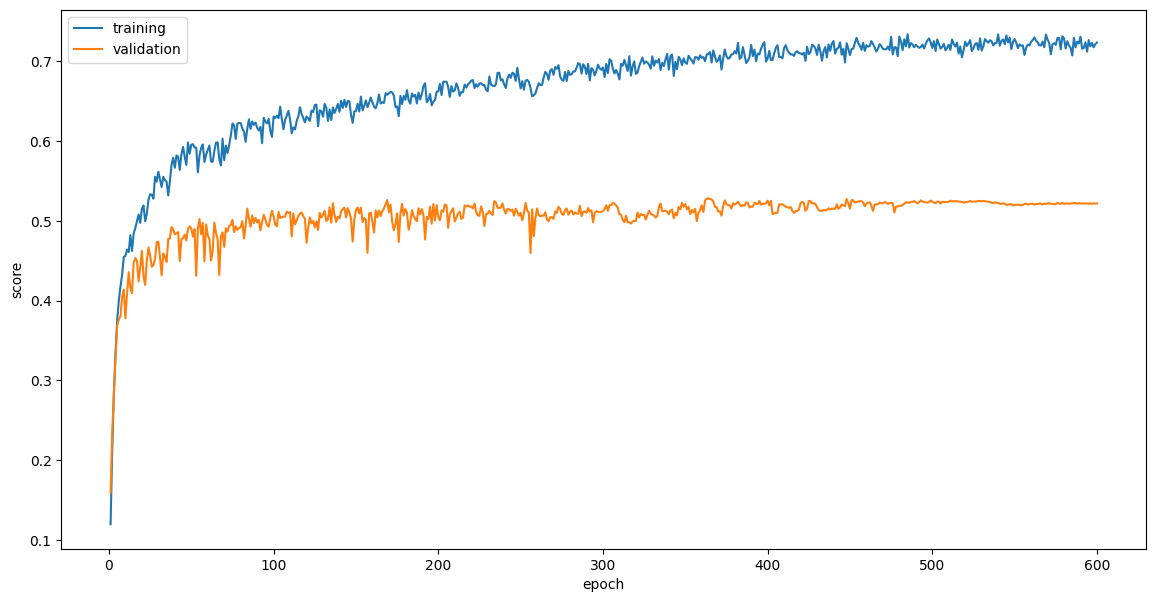

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(table["epoch"], table["training_score"], label="training")
plt.plot(table["epoch"], table["Score"], label="validation")
plt.xlabel("epoch")
plt.ylabel("score")
plt.legend()
plt.savefig("./curve.png", dpi=800, bbox_inches='tight')
plt.show()